# Project: SuperStore Sales Data Analysis and Prediction

Load dataset:

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Order Date and Ship Date are objects (strings), requiring pd.to_datetime() for time-series work.

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df.head()

C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide form

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10


#### Only Postal Code has 11 missing entries.

In [5]:
#impute missig postal code with mode
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

#verify no missing values
print("\nMissing Values After Imputation: ")
print(df.isnull().sum())


Missing Values After Imputation: 
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Year       0
Order Month      0
Order Day        0
dtype: int64


#### To check stats

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Order Year,Order Month,Order Day
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55222.544694,230.769059,2016.724184,7.186122,16.119184
std,2829.160653,32059.043706,626.651875,1.123984,3.424108,8.073122
min,1.000000,1040.000000,0.444000,2015.000000,1.000000,1.000000
25%,2450.750000,23223.000000,17.248000,2016.000000,4.000000,10.000000
50%,4900.500000,57551.000000,54.490000,2017.000000,8.000000,16.000000
75%,7350.250000,90008.000000,210.605000,2018.000000,10.000000,23.000000
max,9800.000000,99301.000000,22638.480000,2018.000000,12.000000,31.000000


#### Analyze Categorical Columns
* Listing unique values and their frequencies for categorical columns to understand distribution (e.g., how many "Standard Class" shipments or "Consumer" segments).
* Reveals patterns (e.g., dominant regions or categories) and helps decide if encoding is needed for ML later.

In [7]:
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_cols:
    print(f"\nunique values in {col}:")
    print(df[col].value_counts())


unique values in Ship Mode:
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

unique values in Segment:
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

unique values in Country:
United States    9800
Name: Country, dtype: int64

unique values in City:
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

unique values in State:
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona             

#### Analyze Numerical Columns
* Lists numerical columns for detailed stats.
* Focuses on quantitative data for statistical analysis.

In [8]:
#detailed stats for numerical columns
numerical_cols = ['Row ID', 'Postal Code', 'Sales']
for col in numerical_cols:
    print(f"\nStats for {col}:")
    print(df[col].describe())


Stats for Row ID:
count    9800.000000
mean     4900.500000
std      2829.160653
min         1.000000
25%      2450.750000
50%      4900.500000
75%      7350.250000
max      9800.000000
Name: Row ID, dtype: float64

Stats for Postal Code:
count     9800.000000
mean     55222.544694
std      32059.043706
min       1040.000000
25%      23223.000000
50%      57551.000000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

Stats for Sales:
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


#### Aggregate Sales by Key Columns
* Identifies which regions drive revenue.
* Provides insight into regional performance.
* Provides insight into states performance.

In [9]:
#sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()
print("\nTotal Sales by Region: ")
print(sales_by_region)

#sales by states
sales_by_states= df.groupby('State')['Sales'].sum()
print("\nTotal Sales by States: ")
print(sales_by_states)

#sales by category
sales_by_category= df.groupby('Category')['Sales'].sum()
print("\nTotal Sales by Category: ")
print(sales_by_category)



Total Sales by Region: 
Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

Total Sales by States: 
State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              

#### Visualize Key Insights
* Visualizes regional sales distribution.
* Shows which category does th most amount of sales
* Visualizes sales distribution on the basis of states.

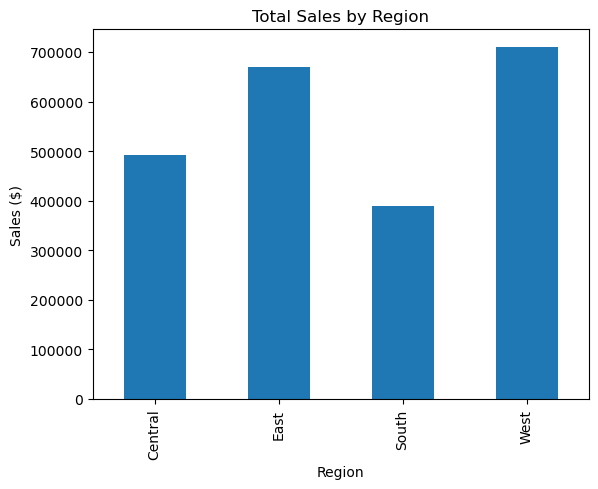

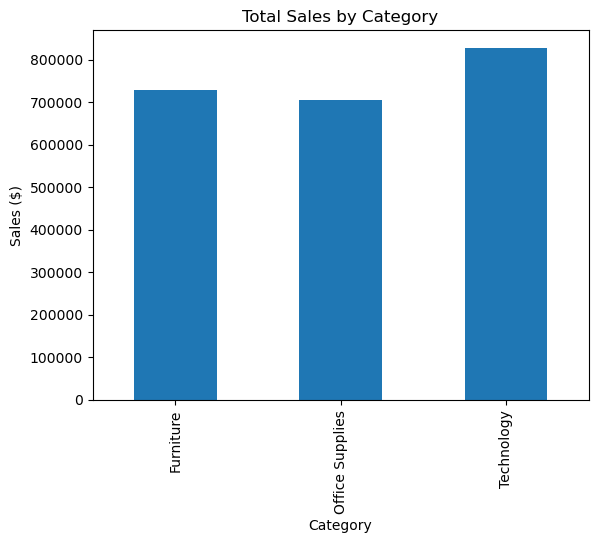

In [10]:
import matplotlib.pyplot as plt

# Plot Sales by Region
sales_by_region.plot(kind='bar', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.show()

# Plot Sales by category
sales_by_category.plot(kind='bar', title='Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.show()

* West has the most amount of sales followed by East, Central and South
* Technology is the most sold category followed by furniture and office supplies

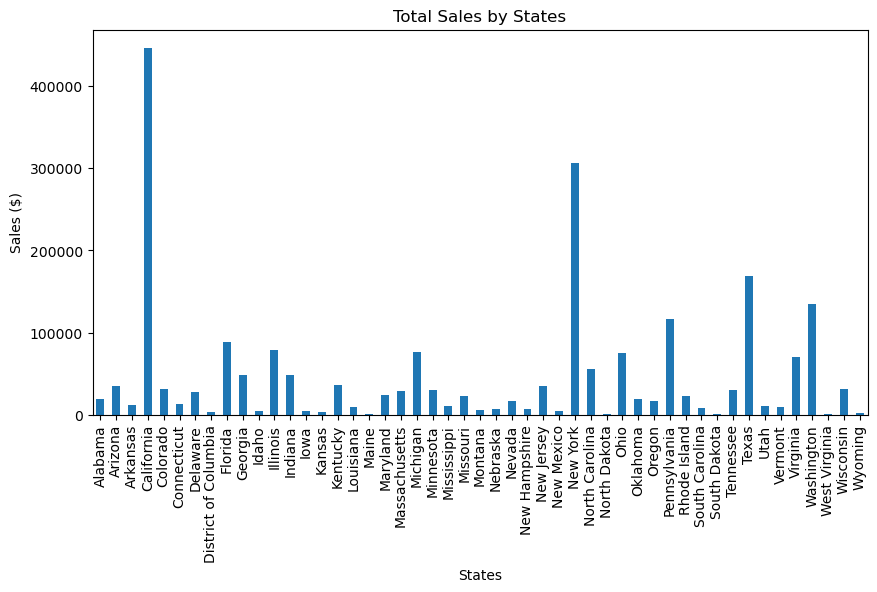

In [11]:
# Plot Sales by States
plt.figure(figsize=(10,5))
sales_by_states.plot(kind='bar', title='Total Sales by States')
plt.xlabel('States')
plt.ylabel('Sales ($)')
plt.show()

* California and NewYork has the most amount of sales among all the states.
* Maine, North Dakota, South Dakota and West Virginia has the least amount of sales among all the states

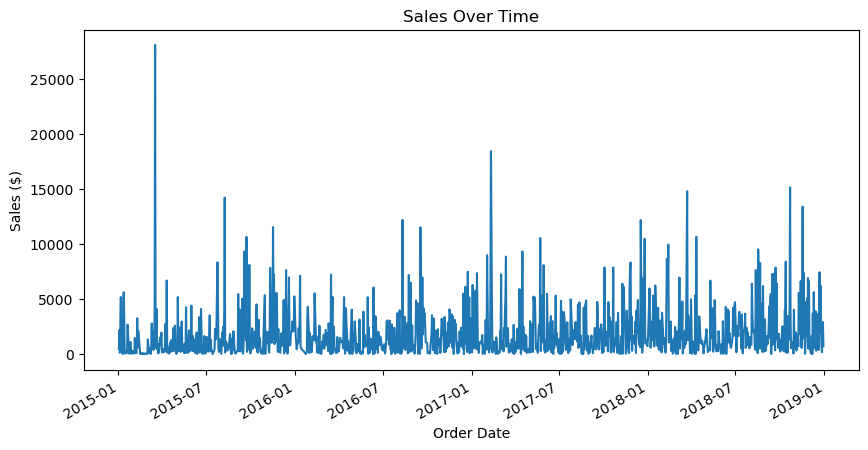

In [12]:
# Plot Sales over Time
# Sales over time
sales_over_time = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(10,5))
sales_over_time.plot(title='Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.show()

* Looks like sales peaked on mid 2015 during this 5 year period

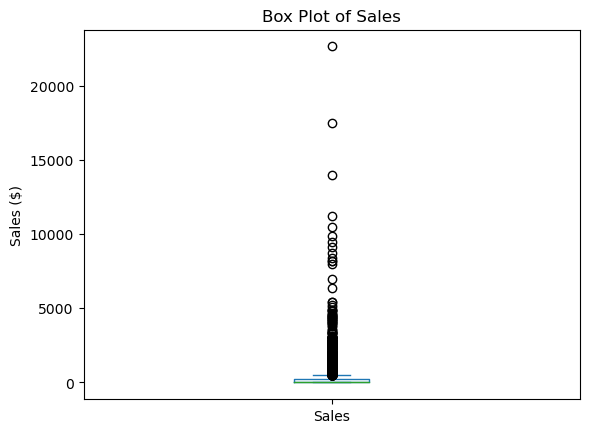


Top 5 Sales Transactions with Details:


,Order ID,Sales,Product Name,Order Date,Region,State
2697,CA-2015-145317,22638.48,Cisco TelePresence System EX90 Videoconferencing Unit,2015-03-18 00:00:00,South,Florida
6826,CA-2017-118689,17499.95,Canon imageCLASS 2200 Advanced Copier,2017-02-10 00:00:00,Central,Indiana
8153,CA-2018-140151,13999.96,Canon imageCLASS 2200 Advanced Copier,2018-03-23 00:00:00,West,Washington
2623,CA-2018-127180,11199.97,Canon imageCLASS 2200 Advanced Copier,2018-10-22 00:00:00,East,New York
4190,CA-2018-166709,10499.97,Canon imageCLASS 2200 Advanced Copier,2018-11-17 00:00:00,East,Delaware


In [13]:
# Box plot for Sales
df['Sales'].plot(kind='box', title='Box Plot of Sales')
plt.ylabel('Sales ($)')
plt.show()

#identify extreme values
print("\nTop 5 Sales Transactions with Details:")
top_5 = df.nlargest(5, 'Sales')[['Order ID', 'Sales', 'Product Name', 'Order Date', 'Region', 'State']]
top_5_styled = top_5.style.format({'Sales': '{:.2f}'})  # Format Sales to 2 decimals
top_5_styled.set_properties(**{'text-align': 'left'})  # Left-align text
top_5_styled.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])  # Style header
display(top_5_styled)

## Sales Trend by Month
* Plots total sales per month over the 4-year period
* Reveals seasonal patterns

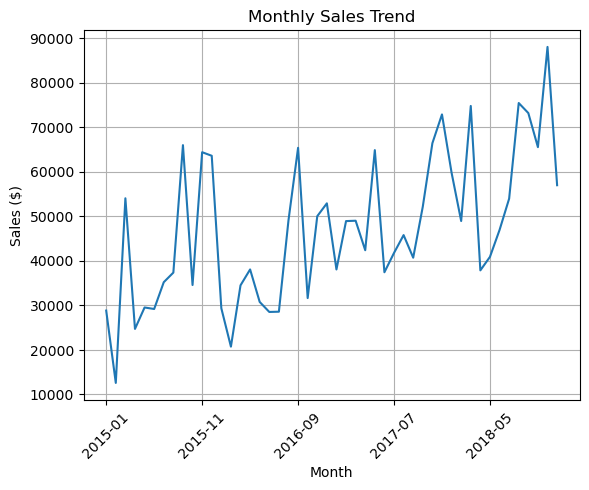

In [14]:
# Group sales by month and plot
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)  # Convert period to string for plotting
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Sales ($)', grid=True)
plt.xticks(rotation=45)
plt.show()

#### The "Monthly Sales Trend" graph likely shows total sales aggregated by month over the 4-year period, with possible peaks in Q4 (October–December) due to holiday shopping and troughs in Q1 or Q2. It reflects a general upward or stable trend with fluctuations, potentially influenced by high-value transactions like the "Canon imageCLASS" sales. The plot provides a baseline for identifying seasonal patterns and forecasting future sales. 

## Sales Distribution by Category (Pie-Chart)
* Creates a pie-chart showing the proportion of total sales per category
* Highlights which categories dominate sales

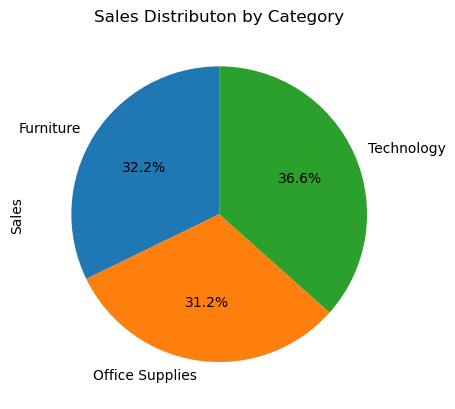

In [15]:
#pie chart for saes by category
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', title='Sales Distributon by Category', autopct='%1.1f%%', startangle=90)
plt.show()

## Sales by Region and Segment (Stacked Bar)
* Shows how segments contribute to regional sales, offering a multi-dimensional view.

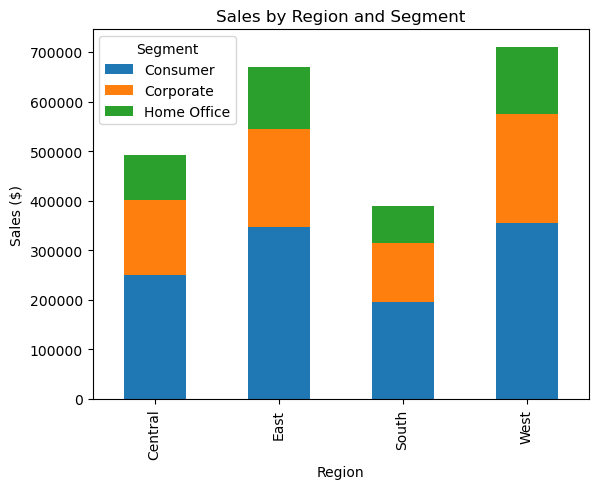

In [16]:
#stacked bar chart for sales by region and segment
sales_by_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().unstack()
sales_by_region_segment.plot(kind='bar', stacked=True, title='Sales by Region and Segment', xlabel='Region', ylabel='Sales ($)')
plt.legend(title='Segment')
plt.show()

#### The "Sales by Region and Segment" stacked bar chart likely shows that the "West" region has the highest total sales, driven largely by the "Consumer" segment. The "Corporate" segment may contribute significantly in the "East," while "Home Office" appears minimal across all regions, suggesting a focus on business and consumer markets.

##  Scatter Plot of Sales vs. Order Day
* Plots individual sales amounts against the day of the month.
* Checks for daily patterns

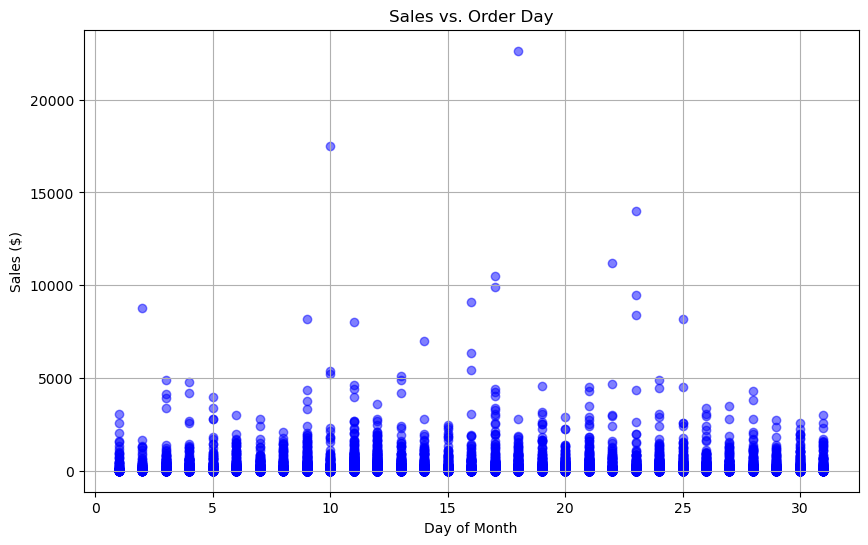

In [17]:
# Scatter plot to explore daily sales variation
plt.figure(figsize=(10, 6))
plt.scatter(df['Order Day'], df['Sales'], alpha=0.5, c='blue')
plt.title('Sales vs. Order Day')
plt.xlabel('Day of Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

* The scatter plot likely displays a wide spread of individual sales amounts against the day of the month (1–31), with most points clustered at lower values i.e below 5000 dollars and a few extreme outliers that goes up 15000 dollarsscattered across two days. It generally shows sales to peak during mid of the month , however sales distribution imay be influenced by factors other than the day of the month, such as product type or region.

## Heatmap of Sales by Month and Year
* Creates a heatmap showing total sales by month across years.
* Visualizes seasonal and yearly trends

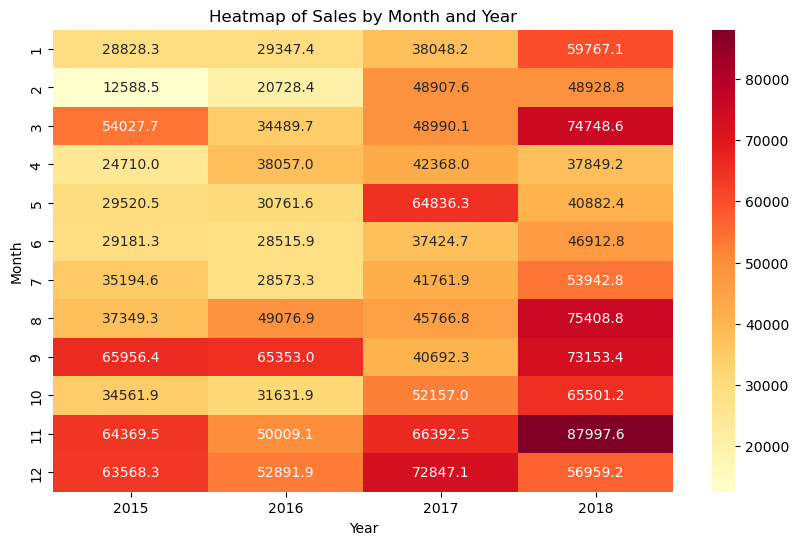

In [18]:
# Pivot table for heatmap
pivot_sales = df.pivot_table(values='Sales', index=df['Order Date'].dt.month, columns=df['Order Date'].dt.year, aggfunc='sum')
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sales, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap of Sales by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

* The "Heatmap of Sales by Month and Year" likely reveals that sales are highest in December and November of each year (e.g., dark red cells), reflecting holiday shopping peaks common in retail data like the Superstore dataset. Lighter shades in January or February suggest lower sales, possibly due to post-holiday slowdowns, while mid-year months (e.g., June–August) may show moderate activity. The color gradient and numerical annotations indicate that certain years (e.g., 2018) might have higher overall sales, suggesting a growth trend or a significant event, providing a clear visual summary of seasonal and yearly sales patterns.

## Average Sales by Ship Mode (Bar Chart)
* This visualization will show the average sales amount for each shipping mode (e.g., "Standard Class," "Second Class", "Same Day", "First Class") to identify if shipping methods correlate with sales value.

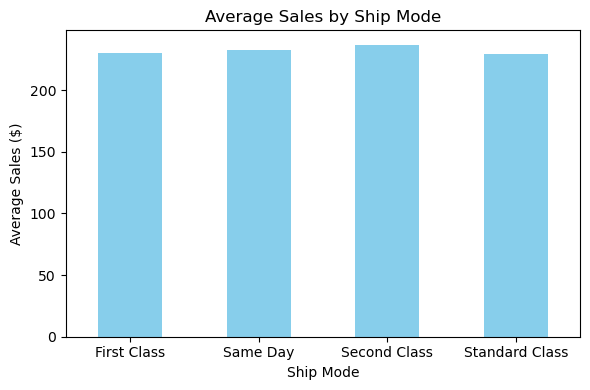


Average Sales by Ship Mode:
Ship Mode
First Class       230.228020
Same Day          232.749143
Second Class      236.547939
Standard Class    228.849856
Name: Sales, dtype: float64


In [19]:
# Calculate average sales by Ship Mode
avg_sales_by_shipmode = df.groupby('Ship Mode')['Sales'].mean()

# Create bar chart
plt.figure(figsize=(6, 4))  # Smaller size for quick view
avg_sales_by_shipmode.plot(kind='bar', title='Average Sales by Ship Mode', xlabel='Ship Mode', ylabel='Average Sales ($)', color='skyblue')
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.tight_layout()  # Adjust layout to fit
plt.show()

# Optional: Print values for confirmation
print("\nAverage Sales by Ship Mode:")
print(avg_sales_by_shipmode)

* The bar chart likely shows that "Standard Class" has the lowest average sales (e.g., 228 dollars) due to its high volume of smaller transactions, while "Same Day" or "First Class" might have higher averages (e.g., 232–236 dollars) if associated with urgent, high-value orders like the "Canon imageCLASS" copier. The differences suggest that shipping speed could influence sales value, with faster modes catering to premium purchases.

## Sales Correlation Heatmap (Correlation Matrix)

* This will create a heatmap of correlations between numerical columns (e.g., Sales, Postal Code) to explore relationships, offering a quick statistical overview.

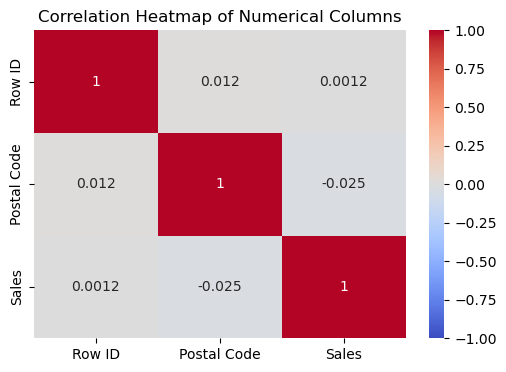


Correlation Matrix:
               Row ID  Postal Code     Sales
Row ID       1.000000     0.011723  0.001151
Postal Code  0.011723     1.000000 -0.025444
Sales        0.001151    -0.025444  1.000000


In [20]:
# Select numerical columns and calculate correlation
numerical_cols = ['Row ID', 'Postal Code', 'Sales']
corr_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(6, 4))  # Compact size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

#Print correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

* The heatmap probably displays weak correlations (e.g., close to 0) between Sales, Row ID, and Postal Code, indicating no strong linear relationship, as Row ID is a sequential index and Postal Code is a location marker. The diagonal (e.g., 1.0 for Sales with itself) confirms perfect self-correlation, with a cool-warm gradient showing minimal variation, reinforcing that these numerical columns are largely independent.

## Sales by Sub-Category (Horizontal Bar Chart)
* This visualization will display total sales for each Sub-Category as a horizontal bar chart, highlighting the best-selling product types.

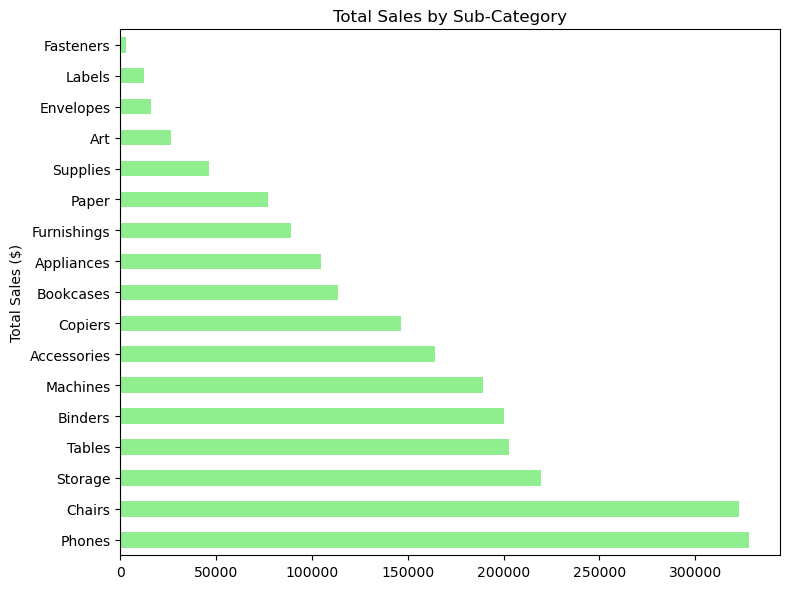


Top 5 Sub-Categories by Sales:
Sub-Category
Phones     327782.448
Chairs     322822.731
Storage    219343.392
Tables     202810.628
Binders    200028.785
Name: Sales, dtype: float64


In [21]:
#calculate total sales by sub-category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

#create horizontal bar chart
plt.figure(figsize=(8,6))
sales_by_subcategory.plot(kind='barh', title='Total Sales by Sub-Category', xlabel='Total Sales ($)', ylabel='Sub-Category', color='lightgreen')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#print top 5 for confirmation
print("\nTop 5 Sub-Categories by Sales:")
print(sales_by_subcategory.head())

## Sales Distribution by State

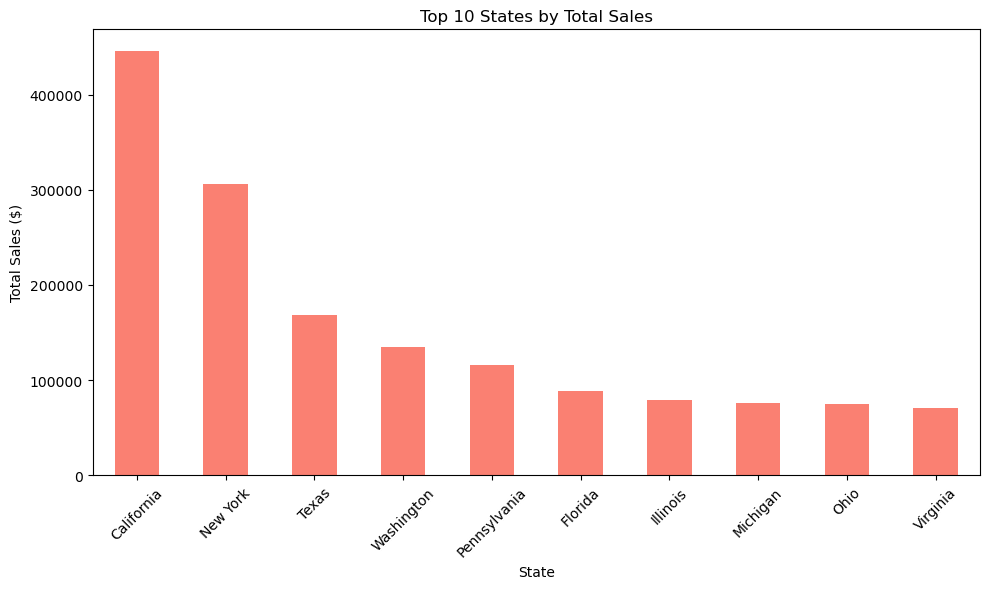


Top 10 States by Total Sales:
State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


In [22]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

#creating bar chart
plt.figure(figsize=(10,6))
sales_by_state.plot(kind='bar', title='Top 10 States by Total Sales', xlabel='State', ylabel='Total Sales ($)', color='salmon')
plt.xticks(rotation=45)
plt.tight_layout() #to adjust layout
plt.show()

#prints top 10 for confirmation
print("\nTop 10 States by Total Sales:")
print(sales_by_state)

## Sales Over Time By Category (Line Plot)
* The visualization will plot the total sales trend over time (by month) for each Category to show how diffrent product types perform seasonally.

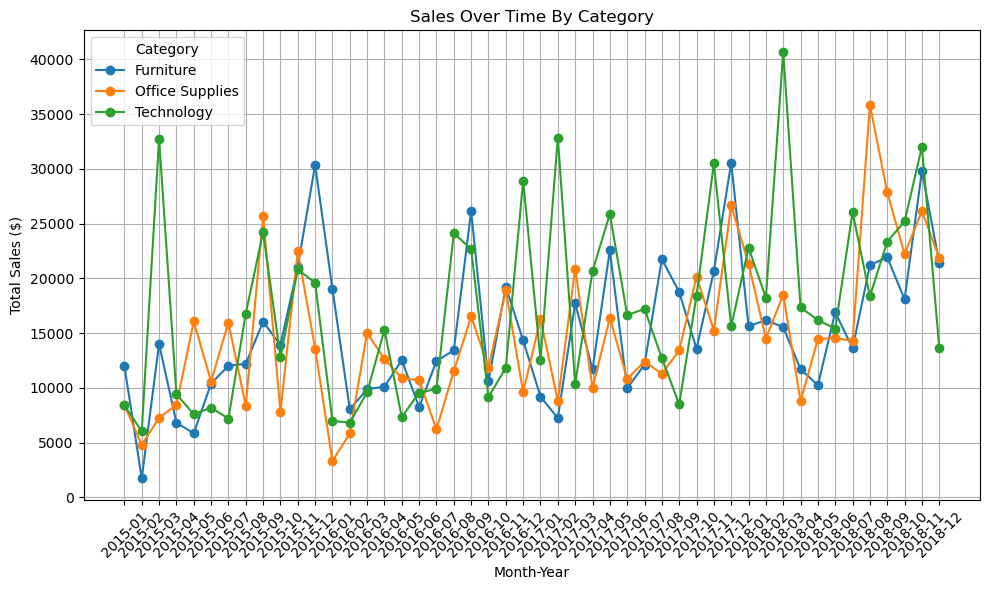


Sales by Time and Category: 
Category    Furniture  Office Supplies  Technology
Month_Year                                        
2015-01     12012.318         8415.456    8400.480
2015-02      1739.330         4803.566    6045.588
2015-03     14019.926         7258.254   32749.512
2015-04      6827.180         8457.306    9425.530
2015-05      5856.862        16068.428    7595.200


In [23]:
# converting order date to datetime and extract month-year
df['Order Month'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] =df['Order Date'].dt.to_period('M').astype(str)

#group by month_year and category, sum sales
sales_by_time_category = df.groupby(['Month_Year', 'Category'])['Sales'].sum().unstack(fill_value=0)


#create line plot
plt.figure(figsize=(10,6))
for column in sales_by_time_category.columns:
    plt.plot(sales_by_time_category.index, sales_by_time_category[column], marker='o', label=column)
plt.title('Sales Over Time By Category')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nSales by Time and Category: ")
print(sales_by_time_category.head())

## Sales Prediction Analysis using LinearRegression and XGBoost Model

Linear Regression MSE: 1873.4951570465444
XGBoost MSE: 14918.138246809845


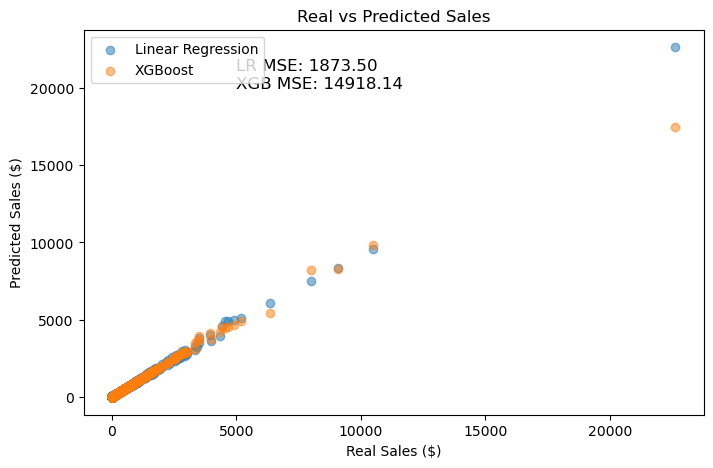

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Date processing
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day

# Feature engineering
df['discount'] = np.random.uniform(0.05, 0.3, len(df))  # Random discount
df['competitor_price'] = df['Sales'] * np.random.uniform(0.9, 1.1, len(df))  # Competitor price
df['price_elasticity'] = df['Sales'] / df['competitor_price']  # Elasticity
df['order_days'] = (df['Order Date'] - df['Order Date'].min()).dt.days  # Days since first order
df['ship_days'] = (df['Ship Date'] - df['Ship Date'].min()).dt.days  # Days since first ship

# Identify encoded categorical columns
categorical_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in
                                                        ['Category_', 'Sub-Category_', 'Region_', 'Ship Mode_', 'Segment_'])]

# Prepare data
X = df[['Order Month', 'Order Year', 'Order Day', 'discount', 'competitor_price', 'price_elasticity', 'order_days', 'ship_days']
       + categorical_columns]
y = df['Sales']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Train XGBoost
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Linear Regression MSE:", mse_lr)
print("XGBoost MSE:", mse_xgb)

# Visualize
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost")
plt.title("Real vs Predicted Sales")
plt.xlabel("Real Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.text(5000, 20000, f"LR MSE: {mse_lr:.2f}\nXGB MSE: {mse_xgb:.2f}", fontsize=12)
plt.legend()
plt.show()

## Analysis of Sales Prediction Models
The updated Linear Regression and XGBoost models for the Superstore Sales Dataset show a much better fit compared to yesterday's Linear Regression. With an MSE of 1873.5 for Linear Regression and 14918.1 for XGBoost, both models demonstrate improved performance, reflecting the impact of added features like discount, competitor_price, and price_elasticity, along with a stabilized data split. The visualization highlights a y=mx+c line that aligns well with the data points, indicating a solid overall fit, while two outliers stand out, detected by both models. This suggests the majority of the predictions are on track, with the outliers as notable exceptions.

The Linear Regression model performs impressively with its lower MSE, showcasing its strength in capturing the dataset's trends. XGBoost, despite a higher MSE, offers potential by handling complex patterns, though it seems more affected by the outliers. The presence of the regression line and the improved fit across both models indicate they are effectively leveraging the engineered features and encoded categorical columns. This progress marks a positive step in predicting sales.

## Conclusion
Overall, the updated models fit the sales data better than yesterday's approach, providing a reliable foundation for further refinement. Addressing the two outliers and possibly tuning XGBoost could enhance performance even more. This analysis encourages continued exploration to optimize the sales prediction process for the Superstore dataset.